In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.drop('Customer', inplace=True, axis=1)
print(data)

           State  Customer Lifetime Value Response  Coverage Education  \
0     Washington              2763.519279       No     Basic  Bachelor   
1        Arizona              6979.535903       No  Extended  Bachelor   
2         Nevada             12887.431650       No   Premium  Bachelor   
3     California              7645.861827       No     Basic  Bachelor   
4     Washington              2813.692575       No     Basic  Bachelor   
...          ...                      ...      ...       ...       ...   
9129  California             23405.987980       No     Basic  Bachelor   
9130  California              3096.511217      Yes  Extended   College   
9131  California              8163.890428       No  Extended  Bachelor   
9132  California              7524.442436       No  Extended   College   
9133  California              2611.836866       No  Extended   College   

     Effective To Date EmploymentStatus Gender  Income Location Code  ...  \
0              2/24/11         Emp

In [5]:
cat = data.select_dtypes(include=np.object)
cat.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,02/03/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


<AxesSubplot:xlabel='State', ylabel='Count'>

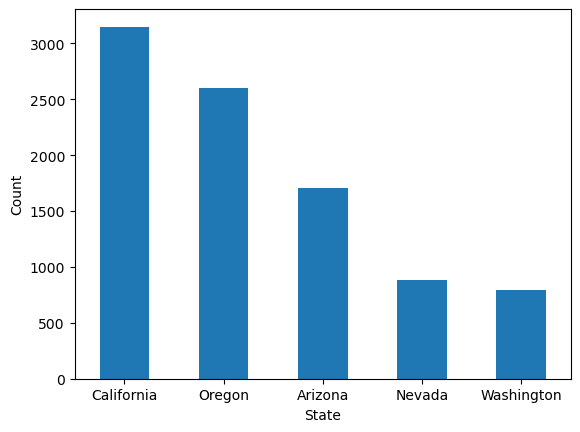

In [7]:
cat['State'].value_counts().plot(kind='bar', xlabel='State', ylabel='Count', rot=0)

<AxesSubplot:xlabel='Response', ylabel='Count'>

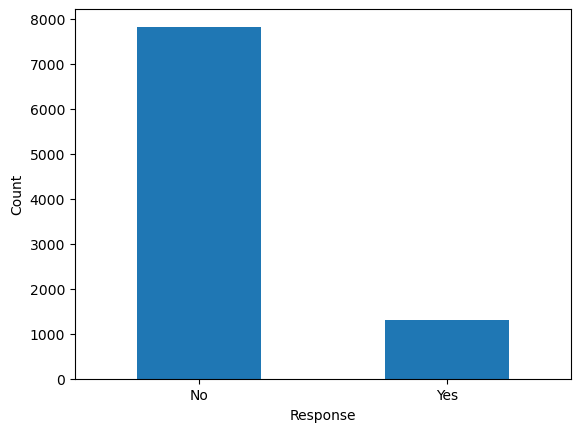

In [8]:
cat['Response'].value_counts().plot(kind='bar', xlabel='Response', ylabel='Count', rot=0) 

<AxesSubplot:xlabel='Coverage', ylabel='Count'>

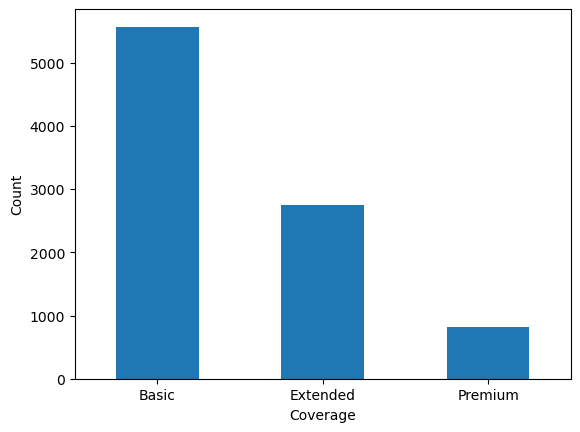

In [9]:
cat['Coverage'].value_counts().plot(kind='bar', xlabel='Coverage', ylabel='Count', rot=0)

<AxesSubplot:xlabel='Education', ylabel='Count'>

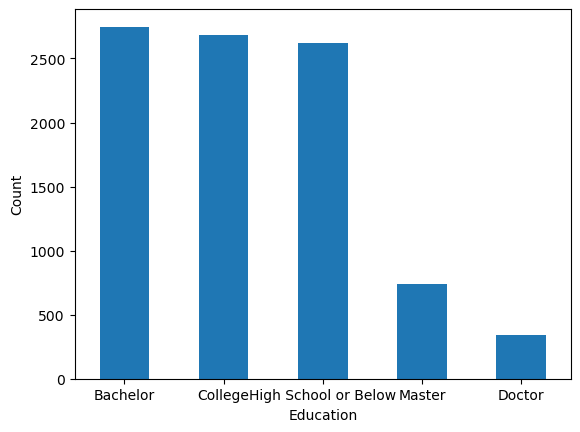

In [10]:
cat['Education'].value_counts().plot(kind='bar', xlabel='Education', ylabel='Count', rot=0)

<AxesSubplot:xlabel='Effective To Date', ylabel='Count'>

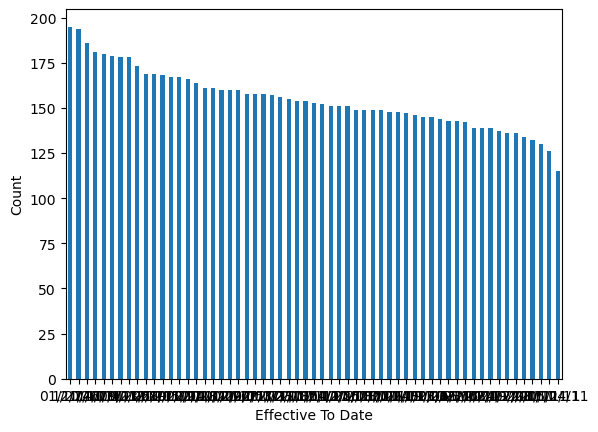

In [11]:
cat['Effective To Date'].value_counts().plot(kind='bar', xlabel='Effective To Date', ylabel='Count', rot=0)

<AxesSubplot:xlabel='EmploymentStatus', ylabel='Count'>

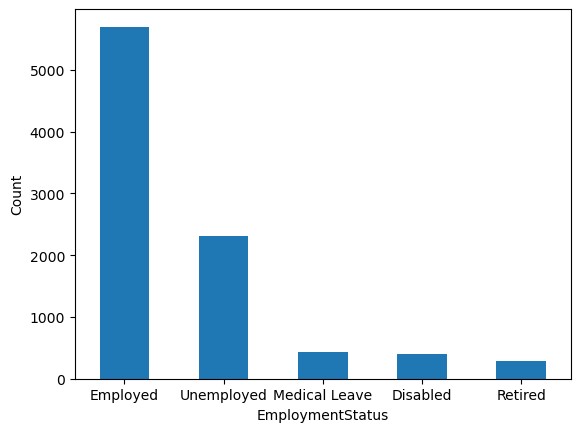

In [12]:
cat['EmploymentStatus'].value_counts().plot(kind='bar', xlabel='EmploymentStatus', ylabel='Count', rot=0)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

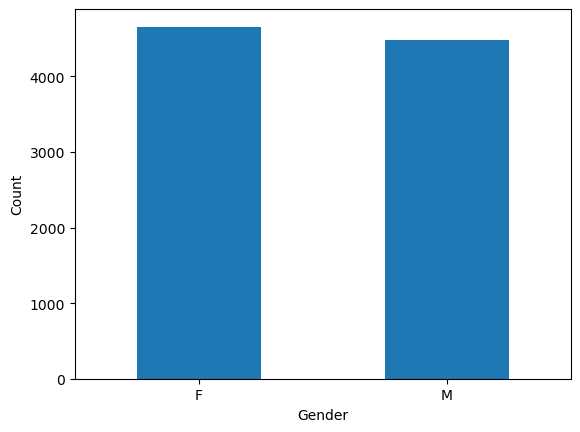

In [13]:
cat['Gender'].value_counts().plot(kind='bar', xlabel='Gender', ylabel='Count', rot=0)

<AxesSubplot:xlabel='Location Code', ylabel='Count'>

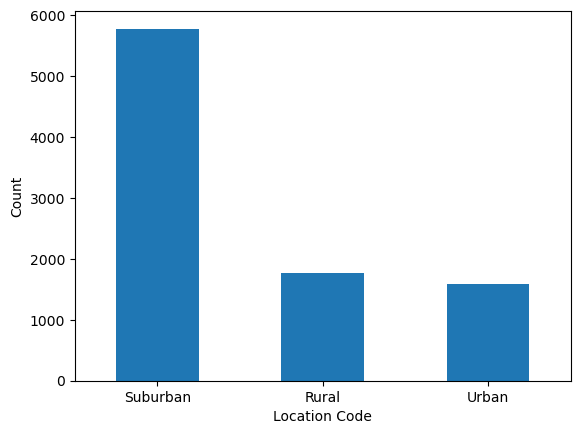

In [14]:
cat['Location Code'].value_counts().plot(kind='bar', xlabel='Location Code', ylabel='Count', rot=0)

<AxesSubplot:xlabel='Marital Status', ylabel='Count'>

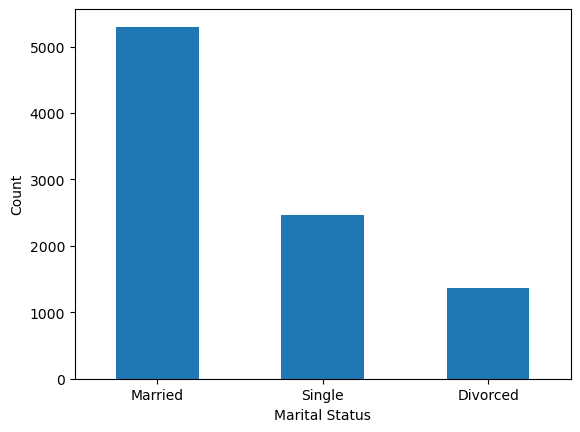

In [18]:
cat['Marital Status'].value_counts().plot(kind='bar', xlabel='Marital Status', ylabel='Count', rot=0)

<AxesSubplot:xlabel='Policy Type', ylabel='Count'>

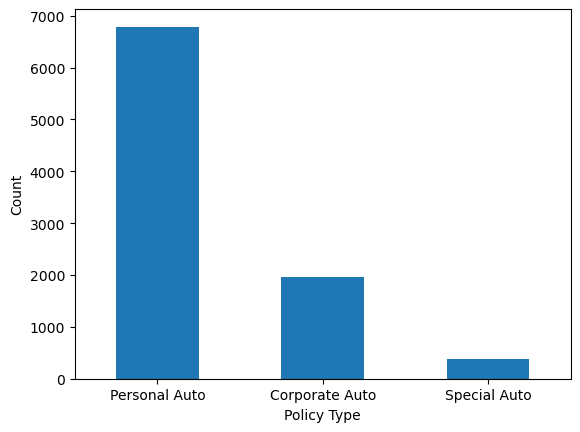

In [19]:
cat['Policy Type'].value_counts().plot(kind='bar', xlabel='Policy Type', ylabel='Count', rot=0)

<AxesSubplot:xlabel='Policy', ylabel='Count'>

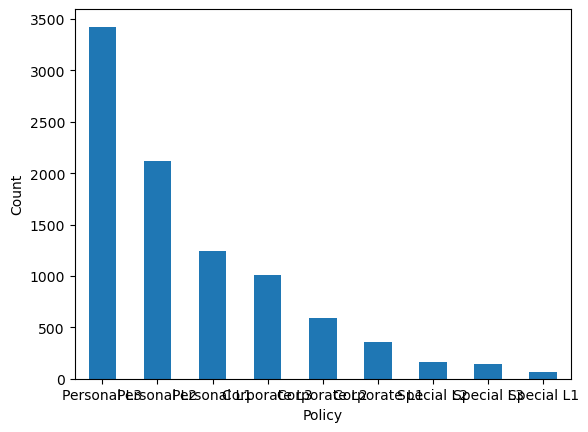

In [20]:
cat['Policy'].value_counts().plot(kind='bar', xlabel='Policy', ylabel='Count', rot=0)

<AxesSubplot:xlabel='State', ylabel='Renew Offer Type'>

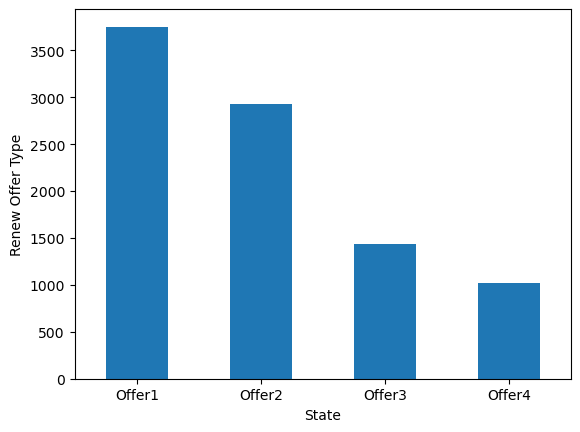

In [21]:
cat['Renew Offer Type'].value_counts().plot(kind='bar', xlabel='State', ylabel='Renew Offer Type', rot=0)

<AxesSubplot:xlabel='State', ylabel='Sales Channel'>

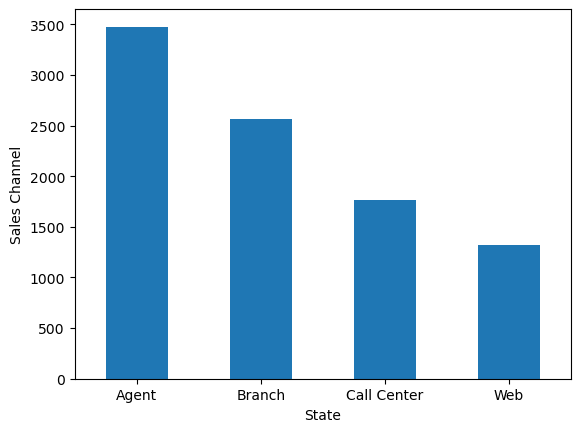

In [22]:
cat['Sales Channel'].value_counts().plot(kind='bar', xlabel='State', ylabel='Sales Channel', rot=0)

<AxesSubplot:xlabel='Vehicle Class', ylabel='Sales Channel'>

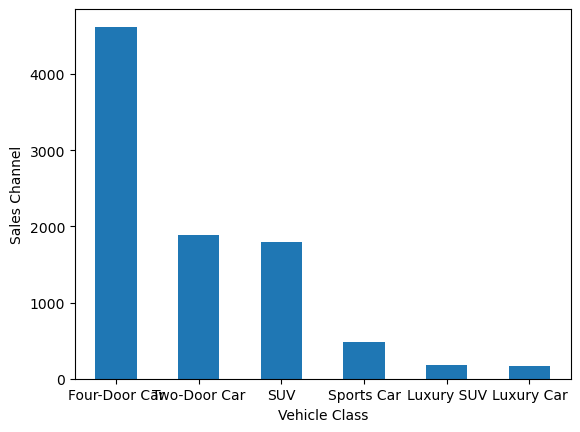

In [23]:
cat['Vehicle Class'].value_counts().plot(kind='bar', xlabel='Vehicle Class', ylabel='Sales Channel', rot=0)

<AxesSubplot:xlabel='Vehicle Size', ylabel='Count'>

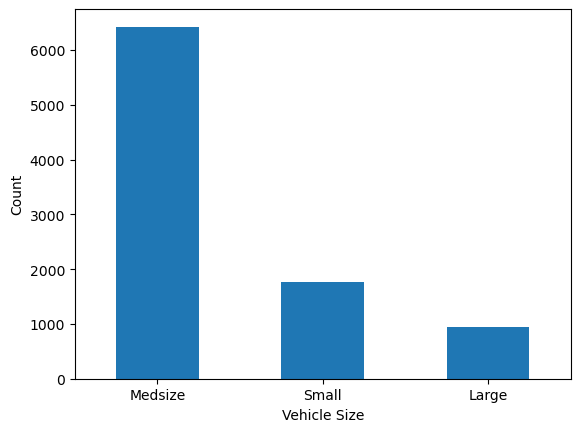

In [24]:
cat['Vehicle Size'].value_counts().plot(kind='bar', xlabel='Vehicle Size', ylabel='Count', rot=0)